# Linear Algebra - Week 3

<div style="display:none;">Dive into the fundamentals of linear algebra for machine learning and data science. This week you'll learn about vectors, projections and linear transformations.</div>

In [1]:
import math
from functools import partial

import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import sympy as sp
from IPython.display import display, Math
from scipy.ndimage import rotate

plt.style.use("seaborn-v0_8-whitegrid")

## Vectors

Let's consider these two vectors:

$\vec{a}=\begin{bmatrix}1\\3\end{bmatrix}$ and $\vec{b}=\begin{bmatrix}4\\1\end{bmatrix}$

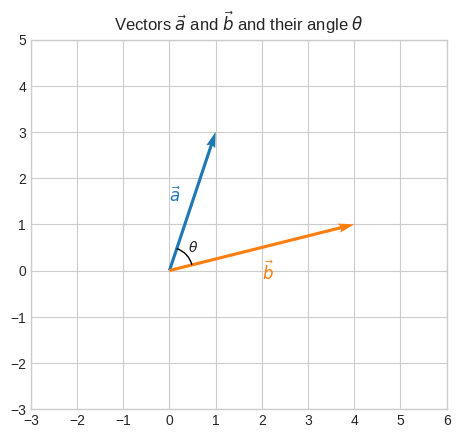

In [2]:
a = np.array([1, 3])
b = np.array([4, 1])

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.title("Vectors $\\vec{a}$ and $\\vec{b}$ and their angle $\\theta$")
plt.show()

### The angle between vectors

To calculate $\theta$ we can use the **Law of Cosines**

> 📐 $\|\vec{c}\|^2 = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

which relates the lengths of the sides of a triangle to the cosine of one of its angles.

We don't have $\vec{c}$ though, but we can demonstrate that $\vec{c} = \vec{b} - \vec{a}$

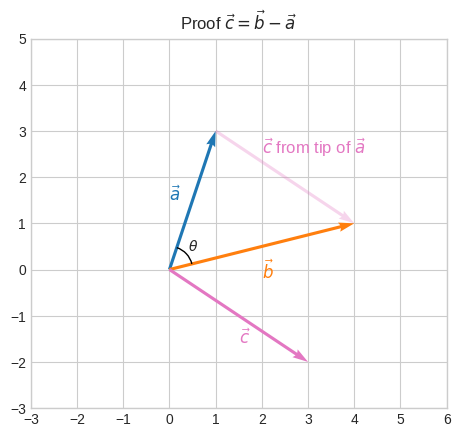

In [3]:
a = np.array([1, 3])
b = np.array([4, 1])
c = b - a

plt.quiver(
    [0, 0, 0, a[0]],
    [0, 0, 0, a[1]],
    [a[0], b[0], c[0], c[0]],
    [a[1], b[1], c[1], c[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange", "tab:pink", "tab:pink"],
    alpha=[1.0, 1.0, 1.0, 0.3],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\vec{c}$", [c[0] / 2, c[1] / 2 - 0.6], color="tab:pink", fontsize=12)
plt.annotate(
    "$\\vec{c}$ from tip of $\\vec{a}$",
    [b[0] / 2, a[1] - 0.5],
    color="tab:pink",
    fontsize=12,
)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Proof $\\vec{c} = \\vec{b} - \\vec{a}$")
plt.gca().set_aspect("equal")
plt.show()

> 🔑 Vectors are unique in that they maintain their direction and magnitude regardless of where they "start" or "end" in space. Vectors are typically drawn starting from the origin to clearly depict their direction and magnitude. However, the true essence of a vector is that it represents a direction and magnitude in space and can be shifted anywhere. When we compute $\vec{c} = \vec{b} - \vec{a}$ we're calculating the vector that starts from the tip of $\vec{a}$ nd goes to the tip of $\vec{b}$. We can draw it starting from the origin or starting from the tip of $\vec{a}$.

Now, that we've established $\vec{c} = \vec{b} - \vec{a}$, let's isolate $\cos\theta$ from the cosine formula 

$\|\vec{c}\|^2 = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$.

$\|\vec{c}\|^2 = \vec{c} \cdot \vec{c}$

$\|\vec{c}\|^2 = (\vec{b} - \vec{a}) \cdot (\vec{b} - \vec{a})$

$\|\vec{c}\|^2 = \vec{b} \cdot \vec{b} + \vec{a} \cdot \vec{a} - 2\vec{a} \cdot \vec{b}$

$\|\vec{c}\|^2 = \|\vec{b}\|^2 + \|\vec{a}\|^2 - 2\vec{a} \cdot \vec{b}$

Let's verify what we've derived so far.

In [4]:
assert np.isclose(np.linalg.norm(c) ** 2, np.dot(c, c))
assert np.isclose(np.linalg.norm(c) ** 2, np.dot(b - a, b - a))
assert np.isclose(
    np.linalg.norm(c) ** 2, np.dot(b, b) + np.dot(a, a) - 2 * np.dot(a, b)
)
assert np.isclose(
    np.linalg.norm(c) ** 2,
    np.linalg.norm(b) ** 2 + np.linalg.norm(a) ** 2 - 2 * np.dot(a, b),
)

Let's substitute it into the cosine formula.

$\|\vec{b}\|^2 + \|\vec{a}\|^2 - 2\vec{a} \cdot \vec{b} = \|\vec{a}\|^2 + \|\vec{b}\|^2 - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

$- 2\vec{a} \cdot \vec{b} = - 2\|\vec{a}\|\|\vec{b}\|\cos\theta$

$\cfrac{- 2\vec{a} \cdot \vec{b}}{- 2\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

> 📐 $\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

The numerator is the dot product of $\vec{a}$ and $\vec{b}$. The denominator is a normalization scalar.

We can actually rewrite it as

$\cfrac{\vec{a}}{\|\vec{a}\|} \cdot \cfrac{\vec{b}}{\|\vec{b}\|} = \cos\theta$

where $\cfrac{\vec{a}}{\|\vec{a}\|}$ and $\cfrac{\vec{b}}{\|\vec{b}\|}$ are the unit vectors of $\vec{a}$ and $\vec{b}$.

And we can verify that the two are indeed the same.

In [5]:
assert np.isclose(
    np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b)),
    np.dot(a / np.linalg.norm(a), b / np.linalg.norm(b)),
)

Once we have $\cos\theta$ we can calculate $\theta$ with the inverse cosine function.

cos(theta): 0.54
theta (radians): 1.00
theta (degrees): 57.53°


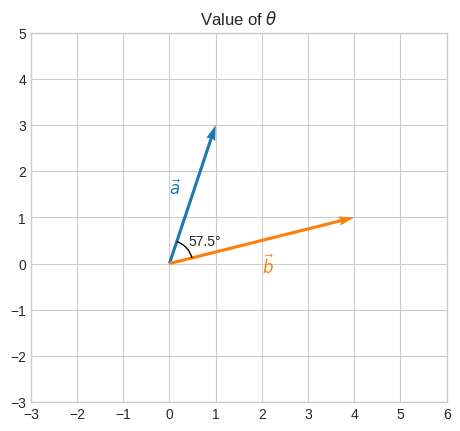

In [6]:
cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
print(f"cos(theta): {cos_theta:.2f}")
print(f"theta (radians): {np.arccos(cos_theta):.2f}")
print(
    f"theta (degrees): {np.degrees(np.arccos(cos_theta)):.2f}\N{DEGREE SIGN}"
)  # or multiply radians by 180/math.pi

a = np.array([1, 3])
b = np.array([4, 1])

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.4, 0.4], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.title("Value of $\\theta$")
plt.show()

### Vector projections

Now, let's say we want to project $\vec{b}$ onto $\vec{a}$.

> 🔑 The vector projection of $\vec{b}$ onto $\vec{a}$ (denoted as $\|\overrightarrow{proj_{a}b}\|$) is a vector with the same direction as $\vec{a}$ and a magnitude such that the tip of $\vec{b}$ lies perpendicularly onto $\vec{a}$. 

It's like $\vec{b}$ casting its shadow onto $\vec{a}$.

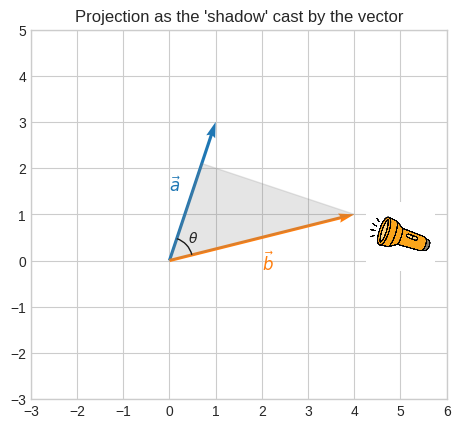

In [7]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
d = b - proj_b

img = plt.imread("../_static/flashlight.jpg")
angle = math.degrees(math.atan2(a[1], a[0])) - 90
imgbox = mpl.offsetbox.OffsetImage(
    rotate(img, angle, reshape=False, cval=255), zoom=0.05
)
imgabb = mpl.offsetbox.AnnotationBbox(imgbox, (5, 0.5), xycoords="data", frameon=False)
angle = math.degrees(math.atan2(a[1], a[0]))

shadow = plt.Polygon(
    [proj_b, b, [0, 0]],
    closed=True,
    fill=True,
    edgecolor="gray",
    facecolor="gray",
    alpha=0.2,
)

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.gca().add_artist(imgabb)
plt.gca().add_patch(shadow)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.5, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection as the 'shadow' cast by the vector")
plt.gca().set_aspect("equal")
plt.show()

The definition of $\cos \theta$ in a right triangle is $adjacent / hypotenuse$.

<img src="https://ichef.bbci.co.uk/images/ic/1280xn/p0dktj82.png" width="300px">
*Source: www.bbc.co.uk/bitesize*

The $hypotenuse$ is the length of vector we want to project ($\|\vec{b}\|$).

The $adjacent$ is the length of such projection ($\|\overrightarrow{proj_{a}b}\|$).

So, by definition:

$\cos\theta = \cfrac{\|\overrightarrow{proj_{a}b}\|}{\|\vec{b}\|}$

and, the **length** of the projection of $\vec{b}$ is:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cos\theta$

<img src="https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcRYHv2gl3xCjoh66VBZOxWU7R3ycaKBEQJLcHeyU-pc9kCcZq_q8WfNjEqE9FK83dtVnpo&usqp=CAU" width="300px">
*Source: www.ncetm.org.uk*

In the image above, we can see an interesting fact.

If the length of the vector we want to project is 1, then the length of the projection is $\cos\theta$.

$\|\overrightarrow{proj_{a}b}\| = \cos\theta$ when $\|\vec{b}\| = 1$

It turns out we don't need $\cos\theta$ to calculate the length of the projection.

We can substitute the definition of $\cos\theta$ into the definition of the length of the projection.

Definition of $\cos\theta$:

$\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

Definition of length of the projection:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cos\theta$

So it becomes:

$\|\overrightarrow{proj_{a}b}\| = \|\vec{b}\|\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|}$

which simplifies to

$\|\overrightarrow{proj_{a}b}\| = \cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|}$

What about the direction?

By definition the projection of $\vec{b}$ onto $\vec{a}$ must have the same direction as $\vec{a}$.

> 🔑 A unit vector has direction $\langle a_1, a_2, ..., a_n \rangle \in\mathbb{R}^n$ and length of 1 ($\|\vec{a}\|=1$).

Let $\|\overrightarrow{proj_{a}b}\|$ be the length of the projection and $\cfrac{\vec{a}}{\|\vec{a}\|}$ be the unit vector of $\vec{a}$, we get that

$\overrightarrow{proj_{a}b} = \|\overrightarrow{proj_{a}b}\| \cfrac{\vec{a}}{\|\vec{a}\|}$

Finally, we can substitute the definition of $\|\overrightarrow{proj_{a}b}\|$ and we obtain the formula of the **projection of** $\vec{b}$ **onto** $\vec{a}$:

> 📐 $\overrightarrow{proj_{a}b} = \cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|} \cfrac{\vec{a}}{\|\vec{a}\|}$

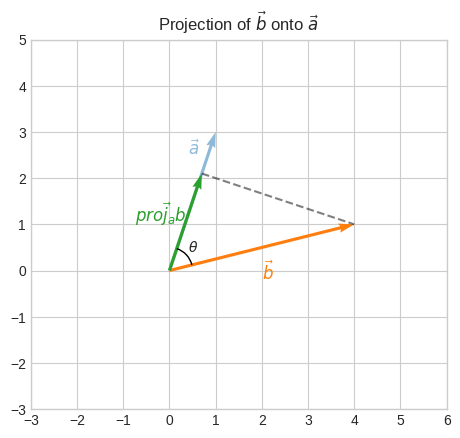

In [8]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))

plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange", "tab:green"],
    alpha=[0.5, 1.0, 1.0],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
    alpha=0.5,
)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.annotate("$\\theta$", [0.4, 0.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.gca().set_aspect("equal")
plt.show()

We can see that $\overrightarrow{proj_{a}b}$ (adjacent) and $\vec{b}$ (hypotenuse) form a right triangle.

In [9]:
a = np.linalg.norm(proj_b)
h = np.linalg.norm(b)
o = np.linalg.norm(proj_b - b)

cos_theta = a / h
sin_theta = o / h

From the Pythagorean theorem we have

$h^2 = o^2 + a^2$

Equivalently:

$1 = (\cfrac{o}{h})^2 + (\cfrac{a}{h})^2$

$1 = \cos\theta^2 + \sin\theta^2$

Let's verify it.

In [10]:
assert h**2 == o**2 + a**2
assert 1 == (o / h) ** 2 + (a / h) ** 2
assert 1 == cos_theta**2 + sin_theta**2

We can also verify that the angles of the triangle sum up to 180.

We already have one angle, and one is 90 by definition. We only need the one between $\vec{b}$ and its adjacent $\vec{proj_b} - \vec{b}$.

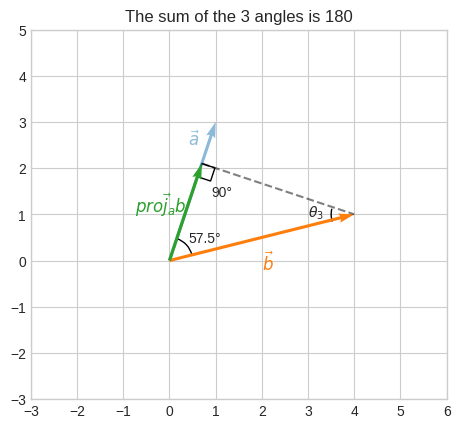

In [11]:
a = np.array([1, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
c = proj_b - b

a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc_1 = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc_1)
b_deg = math.degrees(math.atan2(b[1], b[0]))
c_deg = math.degrees(math.atan2(c[1], c[0]))
arc_2 = mpl.patches.Arc((b[0], b[1]), 1, 1, angle=0, theta1=-180 - b_deg, theta2=-c_deg)
plt.gca().add_patch(arc_2)
arc_3 = plt.Rectangle(
    proj_b,
    -0.3,
    -0.3,
    angle=a_deg,
    fill=False,
    edgecolor="k",
)
plt.gca().add_patch(arc_3)

plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange", "tab:green"],
    alpha=[0.5, 1.0, 1.0],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)

plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
    alpha=0.5,
)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 - 0.7], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.4, 0.4], fontsize=10
)
plt.annotate("$\\theta_3$", [3.0, 0.95], fontsize=10)
plt.annotate("90\N{DEGREE SIGN}", [0.9, 1.4], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.title("The sum of the 3 angles is 180")
plt.show()

Let's find $\cos\theta_3$ and verify that the sum of the 3 angles is 180.

In [12]:
theta_1_deg = np.degrees(np.arccos(cos_theta))

a = np.linalg.norm(proj_b - b)
h = np.linalg.norm(b)
o = np.linalg.norm(proj_b)

cos_theta_2 = a / h
theta_2_deg = np.degrees(np.arccos(cos_theta_2))

theta_3_deg = 90

assert theta_1_deg + theta_2_deg + theta_3_deg == 180

Let's consider a different pair of vectors.

$\vec{a}=\begin{bmatrix}-2\\3\end{bmatrix}$ and $\vec{b}=\begin{bmatrix}4\\1\end{bmatrix}$

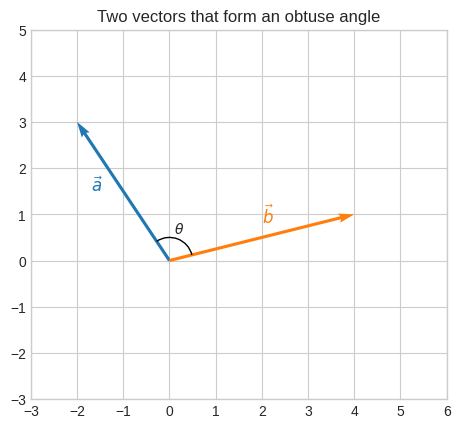

In [13]:
a = np.array([-2, 3])
b = np.array([4, 1])

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate("$\\theta$", [0.1, 0.6], fontsize=10)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.gca().set_aspect("equal")
plt.title("Two vectors that form an obtuse angle")
plt.show()

We can use the 'shadow' metaphor to get an intuition of what the projection of $\vec{b}$ onto $\vec{a}$ might look like.

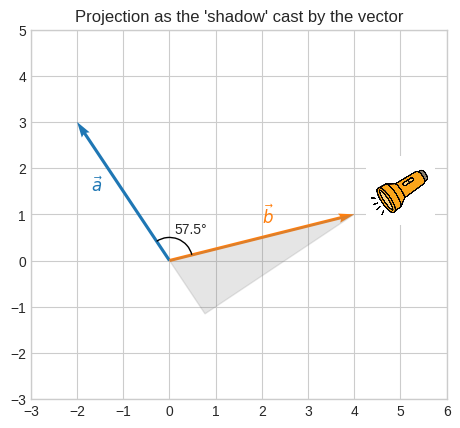

In [14]:
a = np.array([-2, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))
d = b - proj_b

img = plt.imread("../_static/flashlight.jpg")
angle = math.degrees(math.atan2(a[1], a[0])) - 90
imgbox = mpl.offsetbox.OffsetImage(
    rotate(img, angle, reshape=False, cval=255), zoom=0.05
)
imgabb = mpl.offsetbox.AnnotationBbox(imgbox, (5, 1.5), xycoords="data", frameon=False)
angle = math.degrees(math.atan2(a[1], a[0]))

shadow = plt.Polygon(
    [proj_b, b, [0, 0]],
    closed=True,
    fill=True,
    edgecolor="gray",
    facecolor="gray",
    alpha=0.2,
)

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], b[0]],
    [a[1], b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange"],
)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.gca().add_artist(imgabb)
plt.gca().add_patch(shadow)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection as the 'shadow' cast by the vector")
plt.gca().set_aspect("equal")
plt.show()

Let's project $\vec{b}$ onto $\vec{a}$.

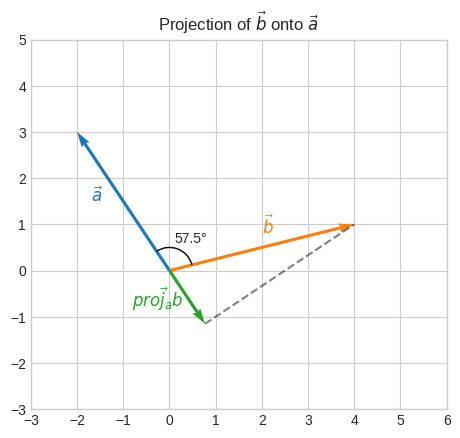

In [15]:
a = np.array([-2, 3])
b = np.array([4, 1])
proj_b = (np.dot(a, b) / np.linalg.norm(a)) * (a / np.linalg.norm(a))

plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange", "tab:green"],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.2, proj_b[1] / 2 - 0.2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.gca().set_aspect("equal")
plt.show()

### Geometric intuition of Dot product

Let's revisit the definition of $\cos\theta$ which we obtained from the **Law of Cosines**.

> 📐 $\cfrac{\vec{a} \cdot \vec{b}}{\|\vec{a}\|\|\vec{b}\|} = \cos\theta$

If we move $\|\vec{a}\|\|\vec{b}\|$ back to the RHS we get

$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|\cos\theta$

And when $\cos\theta > 0$ we can substitute $\|\vec{b}\|\cos\theta$ with $\|\overrightarrow{proj_{a}b}\|$ (whose equivalence was obtained from the general definition $\cos \theta = adjacent / hypotenuse$)

$\vec{a} \cdot \vec{b} = \|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$

> 🔑 When $\vec{a}$ and $\vec{b}$ "agree" on the direction ($0° < \theta < 90°$, that is $\cos\theta > 1$) the dot product between $\vec{a}$ and $\vec{b}$ is the length of $\vec{a}$ times the length of projection $\vec{b}$ onto $\vec{a}$.

Let's verify it.

In [16]:
a = np.array([1, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

assert cos_theta > 0
assert np.isclose(np.dot(a, b), np.linalg.norm(a) * np.linalg.norm(proj_b))

Let's imagine $\vec{b}$ was **parallel** to $\vec{a}$, that is, $\cos\theta = 1$ (0° angle).

Then $\vec{b} = \overrightarrow{proj_{a}b}$. In other words, $\vec{b}$ is already projected onto $\vec{a}$.

In this case

$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|$

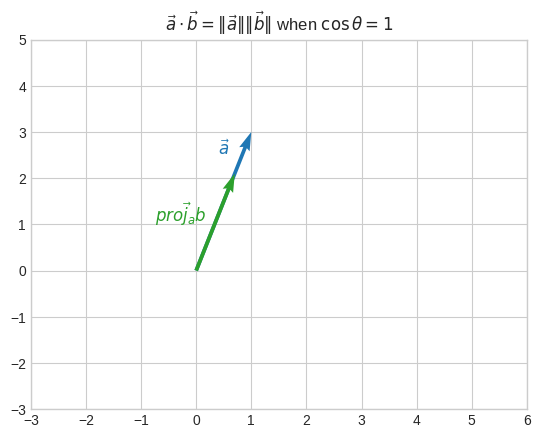

In [17]:
a = np.array([1, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

plt.quiver(
    [0, 0],
    [0, 0],
    [a[0], proj_b[0]],
    [a[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:green"],
)
plt.annotate(
    "$\\vec{a}$",
    [a[0] / 2 - 0.1, a[1] / 2 + 1],
    color="tab:blue",
    fontsize=12,
)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.1, proj_b[1] / 2],
    color="tab:green",
    fontsize=12,
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title(r"$\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|$ when $\cos\theta = 1$")
plt.show()

Let's see the case when the equivalence $\vec{a} \cdot \vec{b} = \|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$ doesn't hold, but $\vec{a} \cdot \vec{b} = \|\vec{a}\|\|\vec{b}\|\cos\theta$ does.

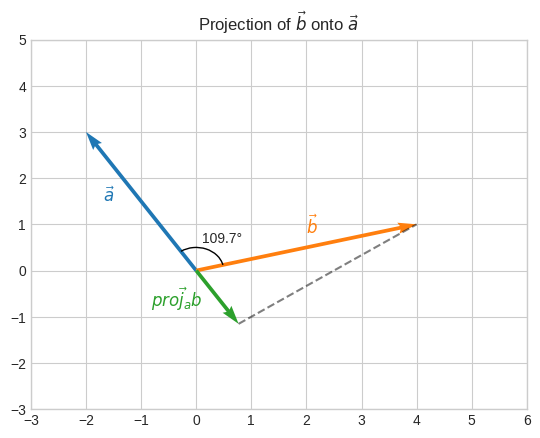

In [18]:
a = np.array([-2, 3])
b = np.array([4, 1])

cos_theta = np.dot(a, b) / (np.linalg.norm(a) * np.linalg.norm(b))
proj_b = np.linalg.norm(b) * cos_theta * a / np.linalg.norm(a)

plt.quiver(
    [0, 0, 0],
    [0, 0, 0],
    [a[0], b[0], proj_b[0]],
    [a[1], b[1], proj_b[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    color=["tab:blue", "tab:orange", "tab:green"],
)
plt.plot([proj_b[0], b[0]], [proj_b[1], b[1]], "k--", alpha=0.5)
a_deg = math.degrees(math.atan2(a[1], a[0]))
b_deg = math.degrees(math.atan2(b[1], b[0]))
arc = mpl.patches.Arc((0, 0), 1, 1, angle=0, theta1=b_deg, theta2=a_deg)
plt.gca().add_patch(arc)
plt.annotate("$\\vec{a}$", [a[0] / 2 - 0.7, a[1] / 2], color="tab:blue", fontsize=12)
plt.annotate("$\\vec{b}$", [b[0] / 2, b[1] / 2 + 0.3], color="tab:orange", fontsize=12)
plt.annotate(
    "$\\vec{proj_{a}b}$",
    [proj_b[0] / 2 - 1.2, proj_b[1] / 2 - 0.2],
    color="tab:green",
    fontsize=12,
)
plt.annotate(
    f"{np.degrees(np.arccos(cos_theta)):.1f}\N{DEGREE SIGN}", [0.1, 0.6], fontsize=10
)
plt.xticks(np.arange(-3, 7, 1))
plt.yticks(np.arange(-3, 6, 1))
plt.title("Projection of $\\vec{b}$ onto $\\vec{a}$")
plt.show()

Since the angle is more than 90°, $\cos\theta < 0$.

So $\vec{a} \cdot \vec{b}$ will be negative.

But $\|\vec{a}\| \|\overrightarrow{proj_{a}b}\|$ is always positive.

In [19]:
print(f"Dot product: {np.dot(a, proj_b):.2f}")
print(
    f"Norm of a times norm of projection: {np.linalg.norm(a) * np.linalg.norm(proj_b):.2f}"
)
print(
    f"Norm of a times norm of b times cos theta: {np.linalg.norm(a) * np.linalg.norm(b) * cos_theta:.2f}"
)

Dot product: -5.00
Norm of a times norm of projection: 5.00
Norm of a times norm of b times cos theta: -5.00


## Linear transformations

Let's define some transformation matrices.

Horizontal scaling by 2:

$A_1=\begin{bmatrix}2&&0\\0&&1\end{bmatrix}$

Horizontal reflection:

$A_2=\begin{bmatrix}-1&&0\\0&&1\end{bmatrix}$

Rotation by 90 degrees clockwise:

$A_3=\begin{bmatrix}0&&1\\-1&&0\end{bmatrix}$

Horizontal shear by 0.5:

$A_4=\begin{bmatrix}1&&0.5\\0&&1\end{bmatrix}$

In [20]:
hscaling = np.array([[2, 0], [0, 1]])
reflection_yaxis = np.array([[-1, 0], [0, 1]])
rotation_90_clockwise = np.array([[0, 1], [-1, 0]])
shear_x = np.array([[1, 0.5], [0, 1]])

Let's apply these transformations to the basis vectors.

$\vec{e_1}=\begin{bmatrix}1\\0\end{bmatrix}$ and $\vec{e_2}=\begin{bmatrix}0\\1\end{bmatrix}$

In [21]:
e1 = np.array([1, 0])
e2 = np.array([0, 1])

A transformation is applied by multiplying $A_k$ by $e_i$.

For $e_1$ we have:

$\begin{bmatrix}2&&0\\0&&1\end{bmatrix}
\begin{bmatrix}1\\0\end{bmatrix} = 
\begin{bmatrix}2 \times 1 + 0 \times 0\\0 \times 1 + 1 \times 0\end{bmatrix} =
\begin{bmatrix}2\\0\end{bmatrix}$

For $e_2$ we have:

$\begin{bmatrix}2&&0\\0&&1\end{bmatrix}
\begin{bmatrix}0\\1\end{bmatrix} = 
\begin{bmatrix}2 \times 0 + 0 \times 1\\0 \times 0 + 1 \times 1\end{bmatrix} =
\begin{bmatrix}0\\1\end{bmatrix}$

Let's verify it.

In [22]:
display(
    Math(
        "T(\\vec{e_1})="
        + sp.latex(sp.Matrix(list(hscaling @ e1)))
        + "T(\\vec{e_2})="
        + sp.latex(sp.Matrix(list(hscaling @ e2)))
    )
)

<IPython.core.display.Math object>

Let's visualize it.

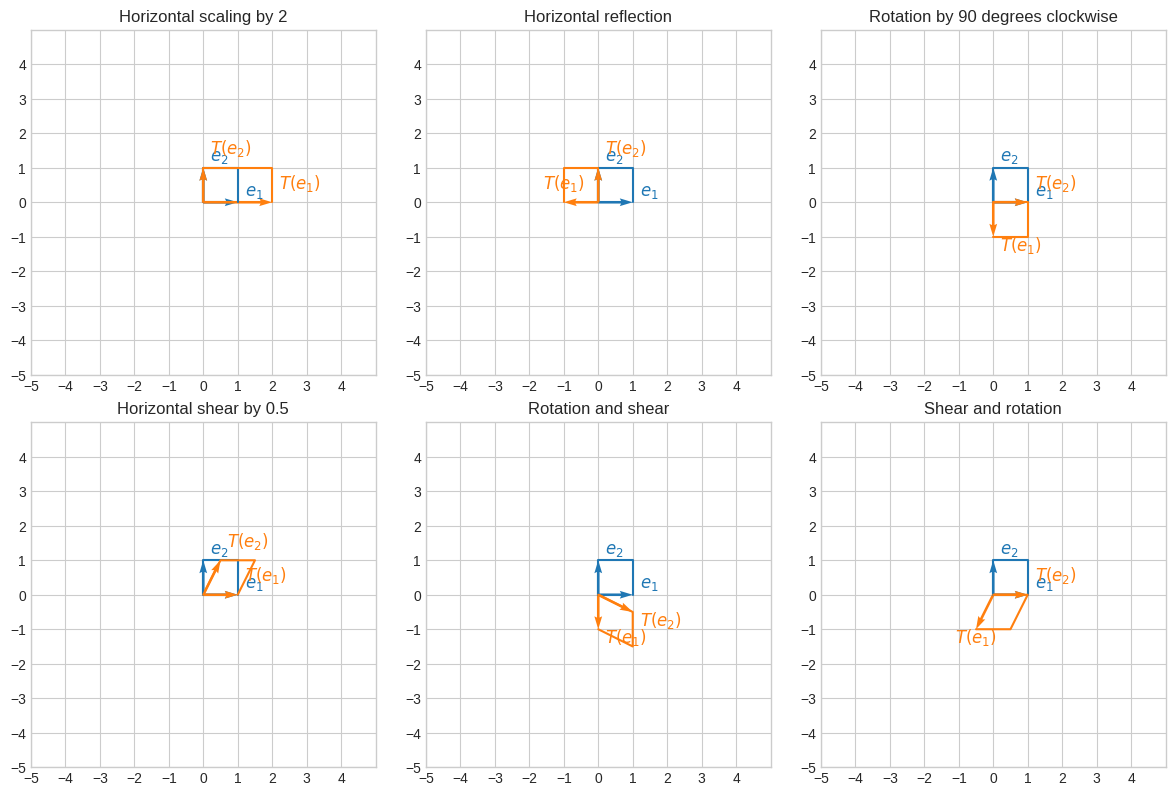

In [23]:
def plot_transformation(T, title, ax, basis=None, lim=5):
    if basis is None:
        e1 = np.array([[1], [0]])
        e2 = np.array([[0], [1]])
    else:
        e1, e2 = basis
    zero = np.zeros(1, dtype="int")
    c = "tab:blue"
    c_t = "tab:orange"
    ax.set_xticks(np.arange(-lim, lim))
    ax.set_yticks(np.arange(-lim, lim))
    ax.set_xlim(-lim, lim)
    ax.set_ylim(-lim, lim)
    _plot_vectors(e1, e2, c, ax)
    ax.plot(
        [zero, e2[0], e1[0] + e2[0], e1[0]],
        [zero, e2[1], e1[1] + e2[1], e1[1]],
        color=c,
    )
    _make_labels(e1, "$e_1$", c, y_offset=(-0.2, 1.0), ax=ax)
    _make_labels(e2, "$e_2$", c, y_offset=(-0.2, 1.0), ax=ax)
    e1_t = T(e1)
    e2_t = T(e2)
    _plot_vectors(e1_t, e2_t, c_t, ax)
    ax.plot(
        [zero, e2_t[0], e1_t[0] + e2_t[0], e1_t[0]],
        [zero, e2_t[1], e1_t[1] + e2_t[1], e1_t[1]],
        color=c_t,
    )
    _make_labels(e1_t, "$T(e_1)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    _make_labels(e2_t, "$T(e_2)$", c_t, y_offset=(0.0, 1.0), ax=ax)
    ax.set_aspect("equal")
    ax.set_title(title)


def _make_labels(e, text, color, y_offset, ax):
    e_sgn = 0.4 * np.array([[1] if i == 0 else i for i in np.sign(e)])
    return ax.text(
        e[0] - 0.2 + e_sgn[0],
        e[1] + y_offset[0] + y_offset[1] * e_sgn[1],
        text,
        fontsize=12,
        color=color,
    )


def _plot_vectors(e1, e2, color, ax):
    ax.quiver(
        [0, 0],
        [0, 0],
        [e1[0], e2[0]],
        [e1[1], e2[1]],
        color=color,
        angles="xy",
        scale_units="xy",
        scale=1,
    )


def T(A, v):
    w = A @ v
    return w


fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(3 * 4, 2 * 4))
ax1, ax2, ax3, ax4, ax5, ax6 = axs.flatten()
plot_transformation(partial(T, hscaling), title="Horizontal scaling by 2", ax=ax1)
plot_transformation(partial(T, reflection_yaxis), title="Horizontal reflection", ax=ax2)
plot_transformation(
    partial(T, rotation_90_clockwise), title="Rotation by 90 degrees clockwise", ax=ax3
)
plot_transformation(partial(T, shear_x), title="Horizontal shear by 0.5", ax=ax4)
plot_transformation(
    partial(T, rotation_90_clockwise @ shear_x), title="Rotation and shear", ax=ax5
)
plot_transformation(
    partial(T, shear_x @ rotation_90_clockwise), title="Shear and rotation", ax=ax6
)
plt.tight_layout()
plt.show()

### Linear transformations and rank

Since linear transformations are matrices, they can be singular and non-singular and also have a rank.

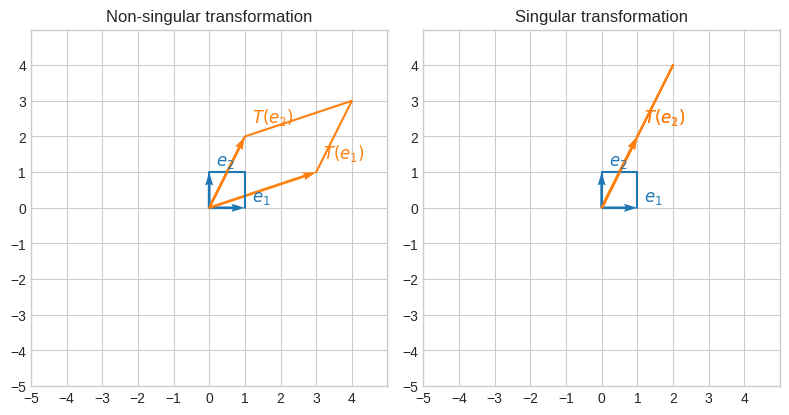

In [24]:
non_sing_tr = np.array([[3, 1], [1, 2]])
sing_tr = np.array([[1, 1], [2, 2]])

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(2 * 4, 1 * 4))
plot_transformation(
    partial(T, non_sing_tr), title="Non-singular transformation", ax=ax1
)
plot_transformation(partial(T, sing_tr), title="Singular transformation", ax=ax2)
plt.tight_layout()
plt.show()

We can also verify that the first linear transformations has rank 2, while the second one has rank 1.

So the first linear transformations doesn't reduce the amount of information of the original matrix, while the second one does as it has reduced the rank from 2 to 1, that is transforms a matrix with 2 linearly independent rows to one with only 1 linearly independent row.

> 🔑 The singularity of a linear transformation determines whether there is dimensionality reduction

> 🔑 The rank of a linear transformation quantifies the dimensionality reduction

In [25]:
m, p = sp.Matrix(non_sing_tr).rref()
print("Number of pivots (rank):", len(p))
m

Number of pivots (rank): 2


Matrix([
[1, 0],
[0, 1]])

In [26]:
m, p = sp.Matrix(sing_tr).rref()
print("Number of pivots (rank):", len(p))
m

Number of pivots (rank): 1


Matrix([
[1, 1],
[0, 0]])

### Linear transformations and determinant

A linear transformation also has a determinant.

> 🔑 The determinant of a linear transformation is the area or volume of the transformed basis vectors

Let's consider thes non-singular transformations

$\begin{bmatrix}3&&1\\1&&2\end{bmatrix}$

whose determinant is 5.

If we apply it to the basis vectors (whose area is 1) we get a parallelogram with area 5.

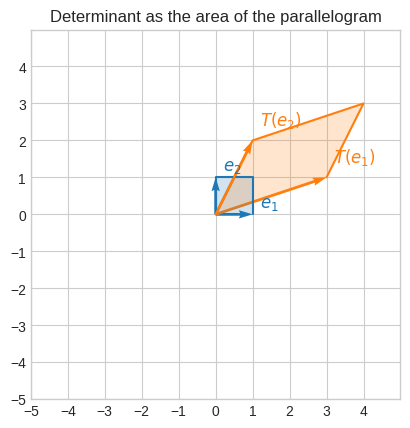

In [27]:
fig, ax = plt.subplots()
plot_transformation(partial(T, non_sing_tr), title="Non-singular transformation", ax=ax)
t_e1 = partial(T, non_sing_tr)(e1)
t_e2 = partial(T, non_sing_tr)(e2)
b_area = plt.Rectangle(
    [0, 0],
    1,
    1,
    fill=True,
    facecolor="tab:blue",
    alpha=0.2,
)
t_area = plt.Polygon(
    [[0, 0], t_e1, t_e1 + t_e2, t_e2],
    closed=True,
    fill=True,
    facecolor="tab:orange",
    alpha=0.2,
)
plt.gca().add_patch(b_area)
plt.gca().add_patch(t_area)
plt.title("Determinant as the area of the parallelogram")
plt.show()

To verify it, we can use the formula for the area of a triangle $A_t = \cfrac{bh}{2}$. For a parallelogram it's just $A_p = bh$.

To calculate $A_p = bh$ we only need $\vec{h}$, because $b = \|T(\vec{e_1})\|$.

To find $\vec{h}$ we can project $T(\vec{e_2})$ onto $T(\vec{e_1})$ and subtract the projection from $T(\vec{e_2})$.

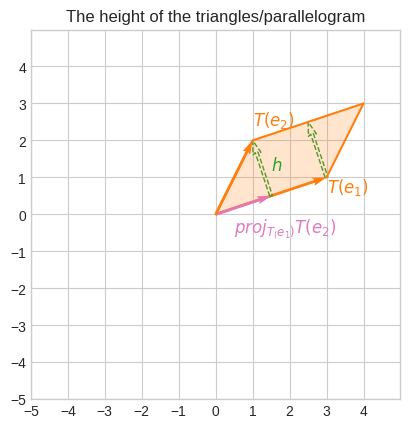

In [28]:
t_e1 = partial(T, non_sing_tr)(e1)
t_e2 = partial(T, non_sing_tr)(e2)
proj_t_e2 = (np.dot(t_e1, t_e2) / np.linalg.norm(t_e1)) * (t_e1 / np.linalg.norm(t_e1))
h = t_e2 - proj_t_e2

plt.quiver(
    [0, 0, 0, proj_t_e2[0], t_e1[0]],
    [0, 0, 0, proj_t_e2[1], t_e1[1]],
    [t_e1[0], t_e2[0], proj_t_e2[0], h[0], h[0]],
    [t_e1[1], t_e2[1], proj_t_e2[1], h[1], h[1]],
    angles="xy",
    scale_units="xy",
    scale=1,
    fc=["tab:orange", "tab:orange", "tab:pink", "none", "none"],
    ec=["none", "none", "none", "tab:green", "tab:green"],
    ls=["solid", "solid", "solid", "dashed", "dashed"],
    linewidth=1,
)
t_area = plt.Polygon(
    [[0, 0], t_e1, t_e1 + t_e2, t_e2],
    closed=True,
    fill=True,
    facecolor="tab:orange",
    alpha=0.2,
)
plt.gca().add_patch(t_area)
plt.plot(
    [0, t_e2[0], t_e1[0] + t_e2[0], t_e1[0]],
    [0, t_e2[1], t_e2[1] + t_e1[1], t_e1[1]],
    color="tab:orange",
)
plt.annotate("$T(e_1)$", [t_e1[0], t_e1[1] - 0.4], color="tab:orange", fontsize=12)
plt.annotate("$T(e_2)$", [t_e2[0], t_e2[1] + 0.4], color="tab:orange", fontsize=12)
plt.annotate(
    "$proj_{T_(e_1)}T(e_2)$",
    [proj_t_e2[0] - 1.0, proj_t_e2[1] - 1.0],
    color="tab:pink",
    fontsize=12,
)
plt.annotate(
    "$h$",
    [t_e2[0] + 0.5, t_e2[1] - 0.8],
    color="tab:green",
    fontsize=12,
)
plt.xticks(np.arange(-5, 5))
plt.yticks(np.arange(-5, 5))
plt.xlim(-5, 5)
plt.ylim(-5, 5)
plt.gca().set_aspect("equal")
plt.title("The height of the triangles/parallelogram")
plt.show()

Now that we have $\vec{h}$, let's calculate $A_p$ and verify it's the same as the determinant of the linear transformation.

In [29]:
assert np.isclose(np.linalg.norm(t_e1) * np.linalg.norm(h), np.linalg.det(non_sing_tr))